In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)


In [2]:
data = pd.read_csv(r"https://raw.githubusercontent.com/7hufofbun/DSEB--Machine-Learning_Group5/refs/heads/main/data/weather_hcm_daily.csv")


In [3]:
data.head(2)

,name,address,resolvedAddress,latitude,longitude,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,windspeedmax,windspeedmean,windspeedmin,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,source
0,Hồ Chí Minh city,Hồ Chí Minh city,"Hồ Chí Minh, Việt Nam",10.776,106.701,2015-01-01,31.0,23.0,26.6,31.4,23.0,26.8,17.9,60.3,0.0,0,0.0,NaN,20.5,15.4,15.4,7.9,2.9,27.3,1012.5,53.8,8.9,230.6,19.9,8,NaN,2015-01-01T06:11:22,2015-01-01T17:41:39,0.36,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,obs
1,Hồ Chí Minh city,Hồ Chí Minh city,"Hồ Chí Minh, Việt Nam",10.776,106.701,2015-01-02,30.0,20.0,25.0,30.4,20.0,25.1,15.8,57.2,0.0,0,0.0,NaN,21.6,13.0,13.0,7.2,2.9,331.6,1013.0,66.3,10.2,186.2,16.1,7,NaN,2015-01-02T06:11:46,2015-01-02T17:42:12,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,obs


In [4]:
data.shape

(3927, 38)

Deleting unrelated columns

In [5]:
data.drop(columns=['latitude', 'longitude', 'name', 'address', 'resolvedAddress', 'source'], inplace=True)
data.shape

(3927, 32)

In [6]:
numerical = data.select_dtypes('number').columns.tolist()

observing histogram => express distribution of each feature

Distribution of features


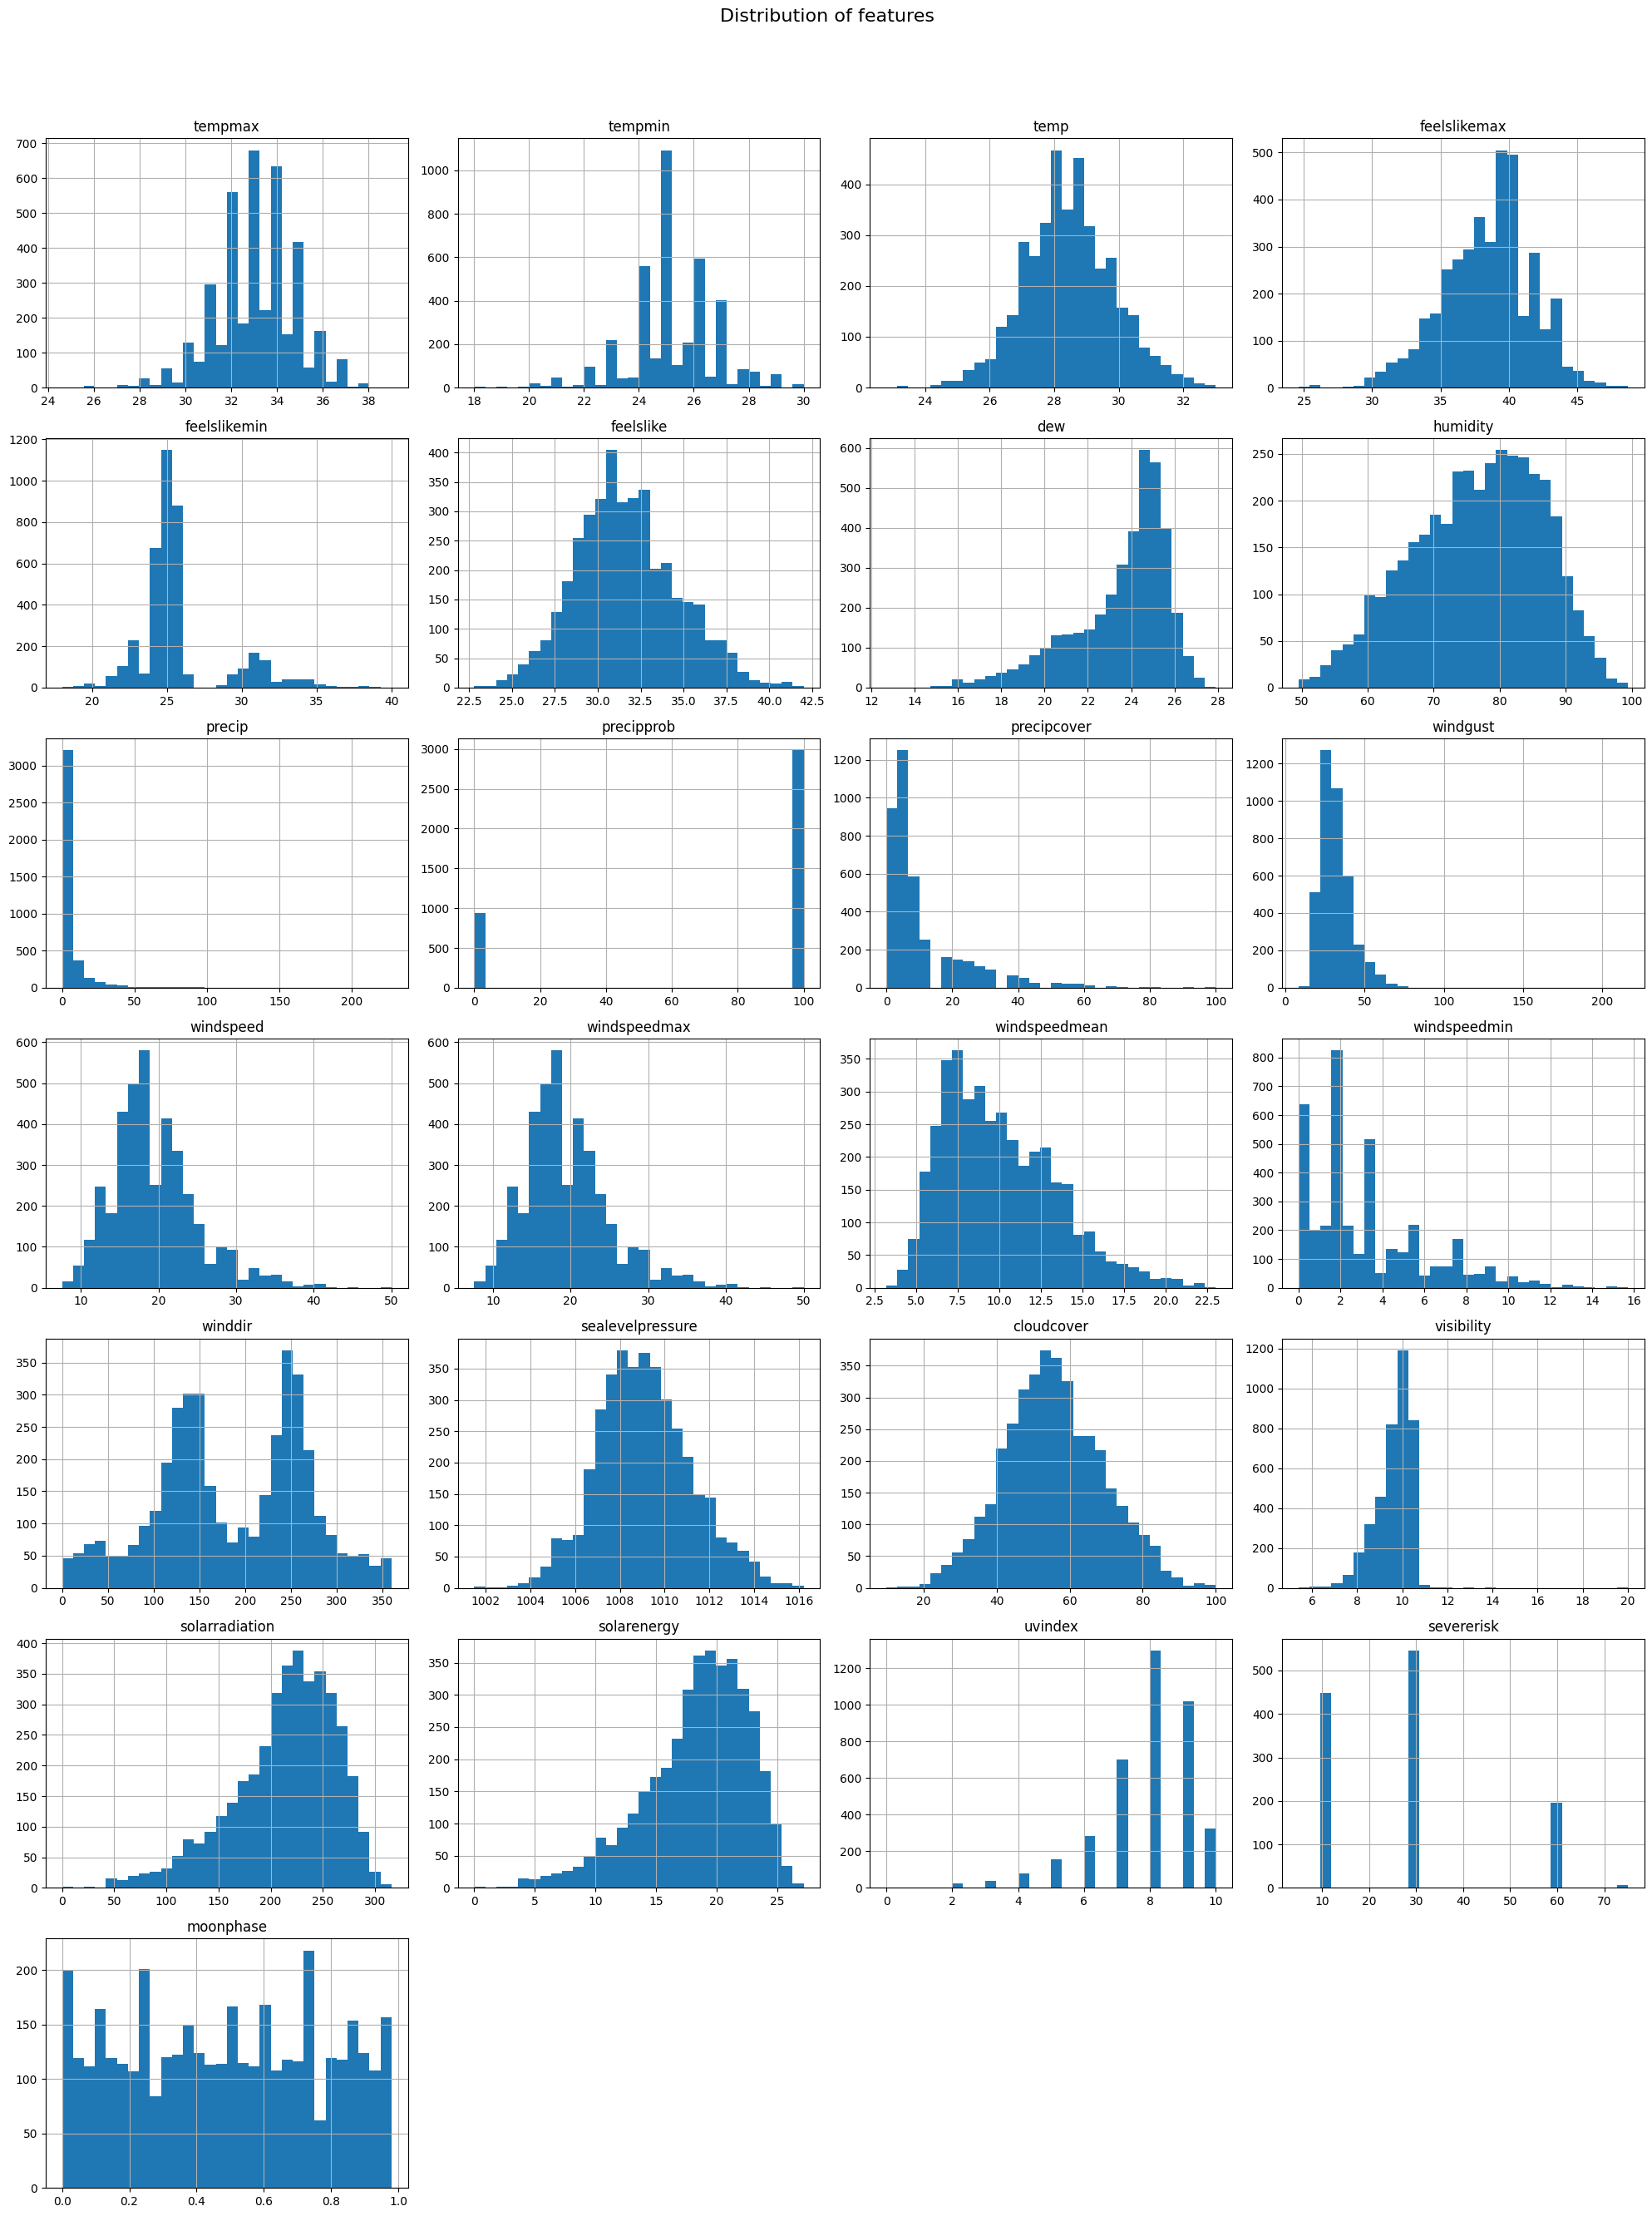

In [7]:
print('Distribution of features')
n_features = len(numerical)

n_cols = 4
n_rows = math.ceil(n_features / n_cols)  

data[numerical].hist(bins=30, figsize=(20, n_rows*4), layout=(n_rows, n_cols))
plt.suptitle("Distribution of features", fontsize = 16)
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

- Các đặc trưng có phân phối gần chuẩn: temp, feelslike, humidity, sealevelpressure, cloudcover
- Phân bố lệch phải (right-skewed / positive skew): precip, precipprob, precipcover, windspeed, windspeedmax, windspeedmean, windspeedmin, uvindex =>  nhiều giá trị thấp, ít giá trị cao
- Phân bố nhiều đỉnh / bimodal: feelslikemin, winddir => có thể xuất phát từ nhiều nhóm dữ liệu khác nhau → cần cân nhắc tạo thêm feature phân loại nhóm.
- Phân bố đều hoặc rải: moonphase => gần như đều → ít thông tin phân biệt theo bin, có thể dùng trực tiếp hoặc nhóm thành các category nếu muốn

### Nhận xét
- Kích thước dữ liệu: Bộ dữ liệu vừa đủ. Hầu hết trục tung đạt giá trị từ 200 đến hơn 1000 với tần suất khá cao. Mô hình huấn luyện trên tập này là vừa đủ để học đc pattern
- Nhiệt độ (temp, tempmax, tempmin, feelslike, feelslikemax, feelslikemin):
- Lượng mưa (precip, precipprob, preciptype, procipcover)
- Gió (winspeed, wingust, windir, windspeedmax, windspeedmin, winspeedmean)
- Bức xạ mặt trời (solarradiation, solarenergy, uvindex)
- Các feature khác (humidity, dew, cloudcover, sealevelpressure)

Normalizing data dtypes

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          3927 non-null   object 
 1   tempmax           3927 non-null   float64
 2   tempmin           3927 non-null   float64
 3   temp              3927 non-null   float64
 4   feelslikemax      3927 non-null   float64
 5   feelslikemin      3927 non-null   float64
 6   feelslike         3927 non-null   float64
 7   dew               3927 non-null   float64
 8   humidity          3927 non-null   float64
 9   precip            3927 non-null   float64
 10  precipprob        3927 non-null   int64  
 11  precipcover       3927 non-null   float64
 12  preciptype        3003 non-null   object 
 13  windgust          3927 non-null   float64
 14  windspeed         3927 non-null   float64
 15  windspeedmax      3927 non-null   float64
 16  windspeedmean     3927 non-null   float64


In [9]:
# convert datetime, sunrise, sunset to datetime format
data['datetime'] = pd.to_datetime(data['datetime'])
data['sunrise'] = pd.to_datetime(data['sunrise'])
data['sunset'] = pd.to_datetime(data['sunset'])

Removing duplicates

In [10]:
data.drop_duplicates(inplace=True)
data.shape

(3927, 32)

Handling missing values

In [11]:
data.isnull().sum()

datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype           924
windgust               0
windspeed              0
windspeedmax           0
windspeedmean          0
windspeedmin           0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2731
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
dtype: int64

In [12]:
new = pd.DataFrame(data.nunique(), columns= ['val'])
new['%'] = new['val'] / data.shape[0] 
new[new['%'] < 0.1]
# Xem số giá trị trong 1 cột, nếu chỉ có 1 value => loại bỏ do ko có sự so sánh ko giúp ích

,val,%
tempmax,99,0.025210
tempmin,82,0.020881
temp,92,0.023428
feelslikemax,180,0.045837
feelslikemin,138,0.035141
feelslike,174,0.044309
dew,126,0.032086
precip,330,0.084034
precipprob,2,0.000509
precipcover,25,0.006366


### Comment:
- Servererisk has 2731 missing values as more than 69% of dataset => Drop servererisk because there is no longer can be imputed if try to impute can cause bias and decrease accuracy
- Preciptype is similar although its missing value around 20%, preciptype has only 1 value 'rain' in cols, so if we keep that feature or impute it with 'ffill' => no meaning to explain temp because 1 value in col => drop column

In [13]:
data.drop(columns=['severerisk', 'preciptype'], inplace=True)
data.shape

(3927, 30)

removing outliers

In [14]:
data.describe()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windgust,windspeed,windspeedmax,windspeedmean,windspeedmin,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase
count,3927,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.00000,3927.00000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927,3927,3927.000000
mean,2020-05-17 00:00:00,33.071683,25.136949,28.445837,38.463305,25.830736,31.671760,23.503896,76.570512,5.208251,75.986758,10.342480,31.897428,19.46221,19.46221,10.029870,3.253603,185.397479,1009.114770,55.594321,9.614719,213.147670,18.403489,7.803667,2020-05-17 05:49:18.241914880,2020-05-17 17:57:37.977591040,0.483990
min,2015-01-01 00:00:00,24.600000,18.000000,22.800000,24.600000,18.000000,22.800000,12.700000,49.500000,0.000000,0.000000,0.000000,8.300000,7.60000,7.60000,3.200000,0.000000,0.000000,1001.500000,9.700000,5.400000,0.000000,0.000000,0.000000,2015-01-01 06:11:22,2015-01-01 17:41:39,0.000000
25%,2017-09-08 12:00:00,32.000000,24.000000,27.500000,36.400000,24.000000,29.700000,22.400000,69.700000,0.100000,100.000000,4.170000,24.800000,15.80000,15.80000,7.400000,1.400000,127.750000,1007.700000,46.450000,9.200000,185.800000,16.100000,7.000000,2017-09-08 17:43:06.500000,2017-09-09 05:58:13,0.250000
50%,2020-05-17 00:00:00,33.000000,25.000000,28.400000,38.800000,25.000000,31.400000,24.200000,77.500000,0.800000,100.000000,4.170000,29.900000,18.40000,18.40000,9.400000,2.300000,180.900000,1009.000000,55.000000,9.800000,221.200000,19.100000,8.000000,2020-05-17 05:30:40,2020-05-17 18:08:41,0.500000
75%,2023-01-23 12:00:00,34.000000,26.000000,29.300000,40.600000,26.000000,33.500000,25.000000,84.200000,5.000000,100.000000,12.500000,36.700000,22.30000,22.30000,12.300000,4.900000,251.600000,1010.500000,64.800000,10.200000,250.000000,21.600000,9.000000,2023-01-23 18:16:52,2023-01-24 05:53:20.500000,0.750000
max,2025-10-01 00:00:00,39.000000,30.000000,33.000000,48.700000,40.000000,42.000000,27.900000,99.400000,227.200000,100.000000,100.000000,216.000000,50.00000,50.00000,23.000000,15.700000,359.700000,1016.200000,100.000000,20.000000,315.800000,27.200000,10.000000,2025-10-01 05:41:59,2025-10-01 17:43:47,0.980000
std,NaN,1.791789,1.586575,1.386448,3.247412,2.943036,2.958532,2.242134,9.681565,12.379588,42.721811,13.218389,10.512640,5.50447,5.50447,3.400972,2.866895,80.712678,2.094073,13.598610,0.778357,49.699875,4.296753,1.494908,NaN,NaN,0.288759


### Because if we remove all outliers => drop nearly 2000 records (> 48% dataset)
- so that we have 2 methods:
    + clip outliers

    + Keep the same and use roburst scaler in train pipeline

In [15]:
def winsorize_by_quantile(df, columns=None, lower_q=0.05, upper_q=0.95):
    dfw = df.copy()
    if columns is None:
        columns = dfw.select_dtypes(include='number').columns
    for col in columns:
        low, high = dfw[col].quantile(lower_q), dfw[col].quantile(upper_q)
        dfw[col] = dfw[col].clip(lower=low, upper=high)
    return dfw

df_wins = winsorize_by_quantile(data)


In [16]:
df_wins.shape

(3927, 30)

Distribution of features


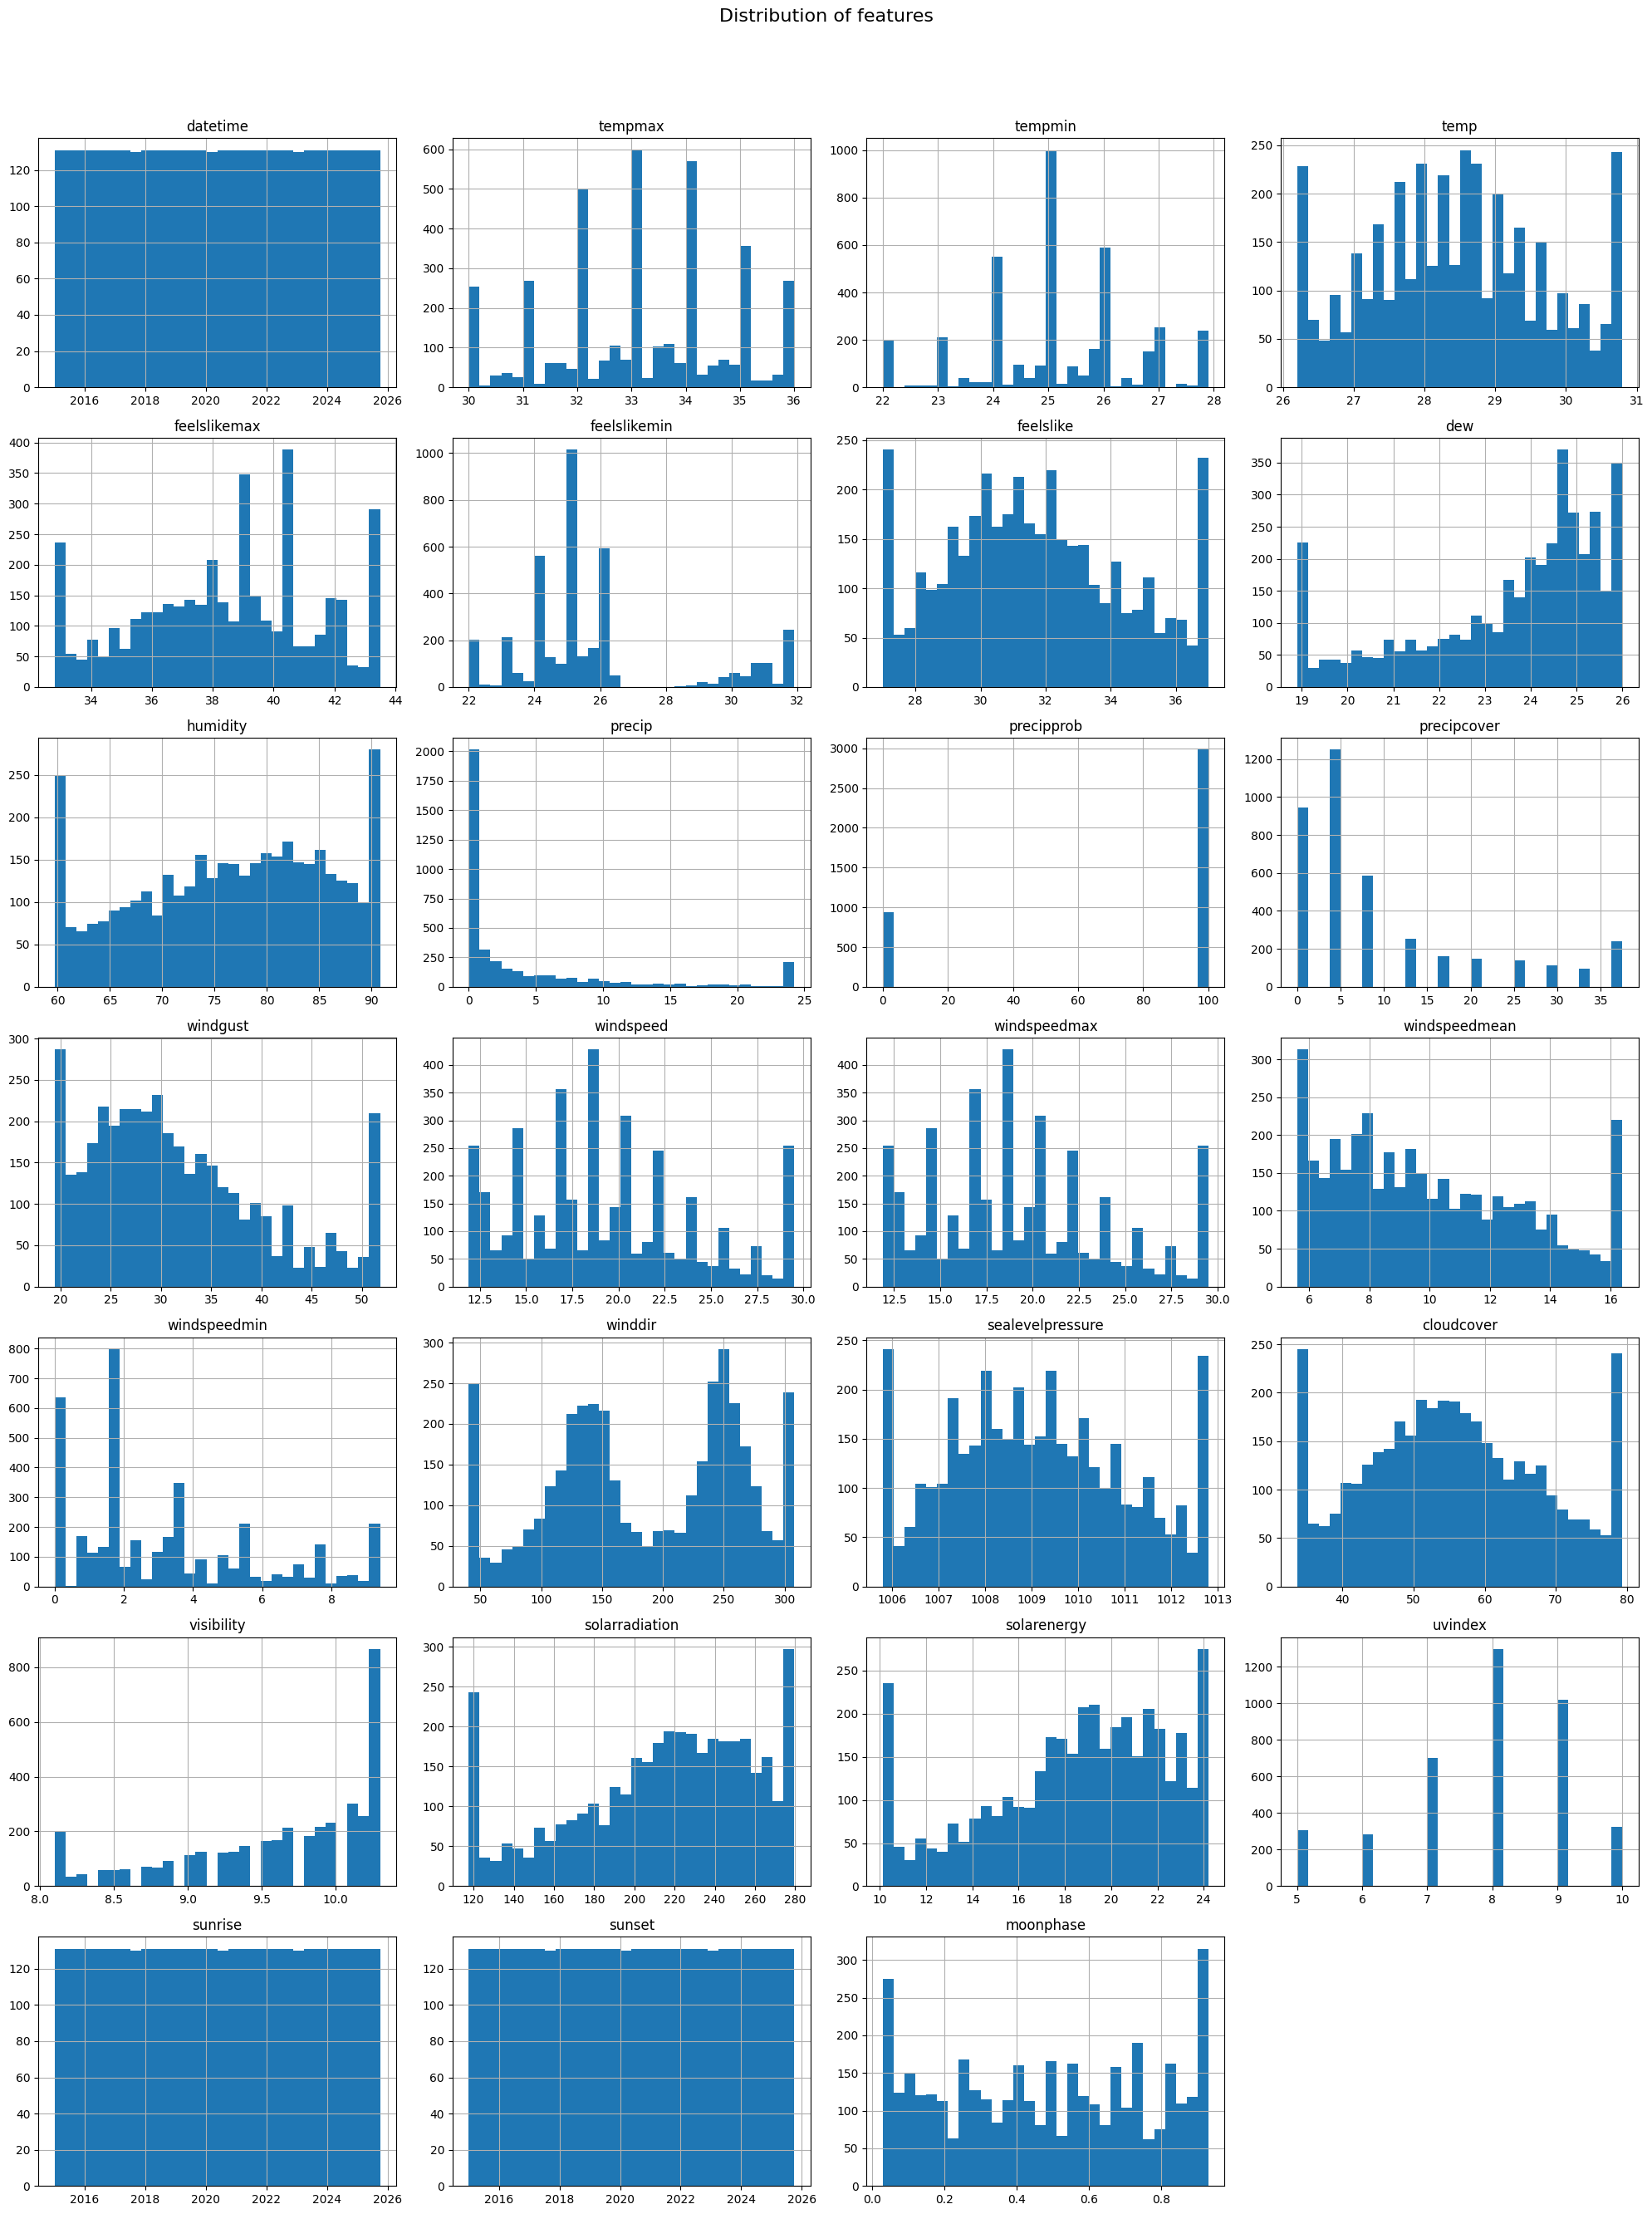

In [17]:
print('Distribution of features')
n_features = len(numerical)

n_cols = 4
n_rows = math.ceil(n_features / n_cols)  

df_wins.hist(bins=30, figsize=(20, n_rows*4), layout=(n_rows, n_cols))
plt.suptitle("Distribution of features", fontsize = 16)
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

### Nhận dạng biến phân loại để encoding
- icon, conditions

In [18]:
data[['icon', 'conditions', 'description']].nunique()

icon            3
conditions      4
description    26
dtype: int64

In [19]:
data.drop(columns='description', inplace = True)
df_wins.drop(columns='description', inplace = True)

In [20]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

def one_hot_encode_features(data, categorical_cols):

    ohe = OneHotEncoder(sparse_output=False, drop=None) 

    # Fit và transform
    encoded = ohe.fit_transform(data[categorical_cols])
    encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(categorical_cols))

    # Gộp với phần còn lại
    data = pd.concat([data.drop(columns=categorical_cols), encoded_df], axis=1)

    return data


In [21]:
data = one_hot_encode_features(data, ['icon', 'conditions'])
df_wins = one_hot_encode_features(df_wins, ['icon', 'conditions'])

Correlation matrix

In [22]:
numerical = data.select_dtypes('number').columns.tolist()

Corelation matrix


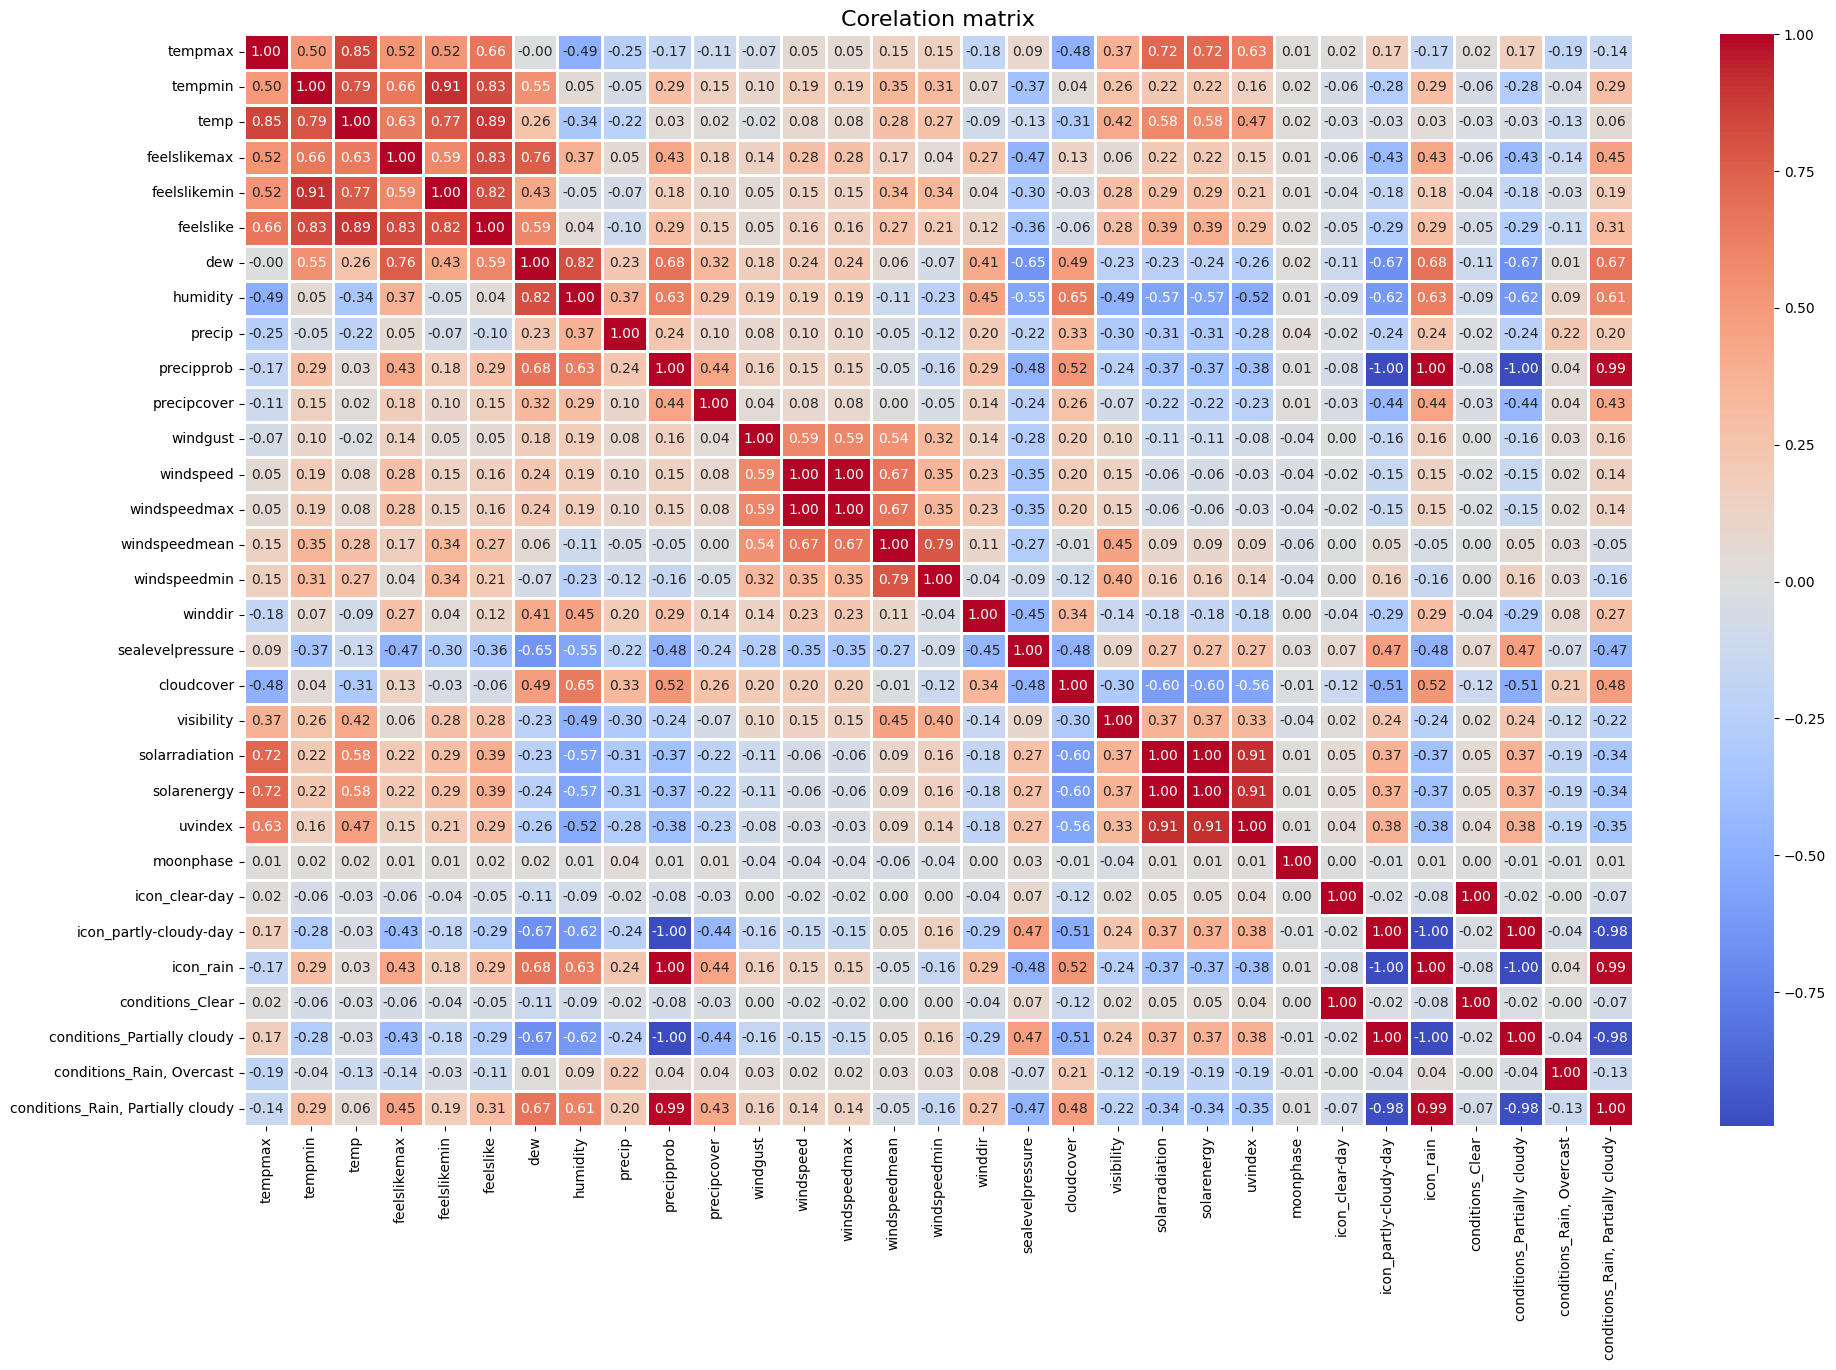

In [23]:
print("Corelation matrix")
plt.figure(figsize=(20, 15))
corr = data[numerical].corr()
sns.heatmap(corr, annot=True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.8)
plt.title("Corelation matrix", fontsize = 16)
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

In [24]:
data[numerical].corr()['temp'].sort_values()

humidity                            -0.339675
cloudcover                          -0.307563
precip                              -0.221646
conditions_Rain, Overcast           -0.129846
sealevelpressure                    -0.128316
winddir                             -0.087161
conditions_Partially cloudy         -0.031603
icon_partly-cloudy-day              -0.031603
conditions_Clear                    -0.026655
icon_clear-day                      -0.026655
windgust                            -0.015512
moonphase                            0.015321
precipcover                          0.023565
icon_rain                            0.034154
precipprob                           0.034154
conditions_Rain, Partially cloudy    0.055396
windspeed                            0.077646
windspeedmax                         0.077646
dew                                  0.260570
windspeedmin                         0.269430
windspeedmean                        0.280446
visibility                        

### Comment: Relationship between dependent variable (temp) and other independent features
- Variables with strong positive correlation with average temperature (temp): 
    + tempmax: 0.85 → very strong, reasonable because average temperature increases when maximum temperature rises.
    + feelslike: 0.89 → extremely strong, as the “feels like” temperature closely reflects the actual temperature.
    + feelslikemin: 0.77 → strong, minimum “feels like” temperature is also related.
    + feelslikemax: 0.63 → fairly strong correlation.
    + tempmin: 0.79 → minimum temperature also strongly affects average temperature.
    + uvindex: 0.47 → moderate correlation, high UV usually occurs when it’s sunny and hot.
    + solarradiation and solarenergy: 0.58 → more sunlight, higher temperature.
- Variables with negative correlation with average temperature (temp):
    + humidity: -0.34 → moderate negative correlation, high temperature often comes with low humidity.
    + cloudcover: -0.31 → cloudy conditions → lower average temperature.
    + Features such as visibility, windspeedmean, winspeedmin, dew, precip, sealevelpressure have weak relationship with temp
- Other variables with weak or near-zero correlation with average temperature (temp): precipprob, windspeed, windgust, winddir, moonphase… → very weak influence.


=> Other temperature variables (max, min, feels like) and sunlight/UV indicators are the strongest factors affecting average temperature. While humidity and cloud cover have moderate negative effects. Other factors like wind, rain, and sea-level pressure have very weak influence on temp

### drop columns that have correlation with target < 0.1

In [25]:
data.drop(columns=['winddir', 'windgust', 'moonphase', 'precipcover', 'precipprob', 'windspeedmax', 'windspeed', 'conditions_Partially cloudy', 'icon_partly-cloudy-day', 'conditions_Clear', 'icon_clear-day', 'icon_rain', 'conditions_Rain, Partially cloudy'], inplace=True)
data.shape

(3927, 21)

In [26]:
df_wins.drop(columns=['winddir', 'windgust', 'moonphase', 'precipcover', 'precipprob', 'windspeedmax', 'windspeed', 'conditions_Partially cloudy', 'icon_partly-cloudy-day', 'conditions_Clear', 'icon_clear-day', 'icon_rain', 'conditions_Rain, Partially cloudy'], inplace=True)
data.shape

(3927, 21)

We should drop those features have very weak relationshipp with target (abs(cor)<0.01) 


Some couples of features show strong relationship can cause perfect colinearity: (giữ lại feature quan trọng nhất do có nhiều feature chỉ ra điều giống nhau ko cần thiết)
- uvindex, solarradiation, solarenergy: >0.9 
- winspeed, winspeedmax: 1 => bỏ 1 trog 2
- winspeedmin, weenspeedmean: > 0.7
- humidity, dew: >0.8 
- tempmin, feelslike: >0.8
- feelslikemin, tempmin: >0.9
- feelslike, feelslikemax: >0.7


In [27]:
data.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'windspeedmean', 'windspeedmin', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'sunrise', 'sunset', 'conditions_Rain, Overcast'], dtype='object')

In [28]:
data.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,windspeedmean,windspeedmin,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,"conditions_Rain, Overcast"
0,2015-01-01,31.0,23.0,26.6,31.4,23.0,26.8,17.9,60.3,0.0,7.9,2.9,1012.5,53.8,8.9,230.6,19.9,8,2015-01-01 06:11:22,2015-01-01 17:41:39,0.0
1,2015-01-02,30.0,20.0,25.0,30.4,20.0,25.1,15.8,57.2,0.0,7.2,2.9,1013.0,66.3,10.2,186.2,16.1,7,2015-01-02 06:11:46,2015-01-02 17:42:12,0.0
2,2015-01-03,32.0,23.0,26.8,33.5,23.0,27.4,19.0,63.7,0.2,7.8,1.8,1012.0,52.7,9.8,185.8,16.0,8,2015-01-03 06:12:09,2015-01-03 17:42:44,0.0
3,2015-01-04,32.0,24.0,27.1,34.8,24.0,28.3,21.3,71.7,0.0,6.3,2.9,1010.2,59.3,8.4,125.8,10.9,4,2015-01-04 06:12:32,2015-01-04 17:43:17,0.0
4,2015-01-05,30.6,24.9,26.7,33.2,24.9,27.7,22.1,76.4,6.0,5.5,1.1,1010.0,78.0,9.1,163.4,14.1,8,2015-01-05 06:12:54,2015-01-05 17:43:50,0.0
